<a href="https://colab.research.google.com/github/DRAGNIIR/AI-learning/blob/main/money_identify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import liberary
import os 
import numpy as np
from numpy import save
from keras.utils import to_categorical, load_img, img_to_array
from keras.models import Sequential,Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout, LeakyReLU
from keras.optimizers import SGD
import matplotlib.pyplot as plt
# create a folder variable to contain photos
folder = '/content/drive/MyDrive/money'
photos, labels = list(), list()

# scanning and categorize each phote for each banknote
for file in os.listdir(folder):
    output = None
    if file.startswith('5kdong'):
        output = 0  
    elif file.startswith('10kdong'):
        output = 1
    elif file.startswith('20kdong'):
        output = 2
    elif file.startswith('50kdong'):
        output = 3
    elif file.startswith('100kdong'):
        output = 4
    elif file.startswith('500kdong'):
        output = 5
#adding photos to a data set 
    if output is not None:
       
        image = load_img(os.path.join(folder, file), target_size=(200,200,3))
        image = img_to_array(image)      
        photos.append(image)
        labels.append(output)

#redefine type for array
photos = np.array(photos) 
labels = np.array(labels)

#normalizing photos array
photos = photos.astype('float32')/255

# One-hot encode labels
labels = to_categorical(labels,6)

#shaping a model
model = Sequential()
model.add(Conv2D(64,(3,3), padding='same', input_shape=(200, 200,3)))
model.add(Activation('linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,(3,3)))
model.add(Activation('linear'))
model.add(Conv2D(128,(3,3)))
model.add(Activation('linear'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='linear'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))
model.summary()

#compile the model using sgd from keras.models

sgd = SGD(lr = 0.001, decay = 1e-6, momentum = 0.9, nesterov= True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history = model.fit(photos, labels, batch_size=128, epochs=20, verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 200, 200, 64)      1792      
                                                                 
 activation_3 (Activation)   (None, 200, 200, 64)      0         
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 200, 200, 64)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 100, 100, 64)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 98, 98, 128)       73856     
                                                                 
 activation_4 (Activation)   (None, 98, 98, 128)       0         
                                                      

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 11s 11s/step - loss: 1.8622 - accuracy: 0.2308
Epoch 2/20
1/1 [==============================] - 12s 12s/step - loss: 1.7539 - accuracy: 0.3846
Epoch 3/20
1/1 [==============================] - 13s 13s/step - loss: 1.7848 - accuracy: 0.1923
Epoch 4/20
1/1 [==============================] - 13s 13s/step - loss: 1.7066 - accuracy: 0.2308
Epoch 5/20
1/1 [==============================] - 12s 12s/step - loss: 1.7253 - accuracy: 0.1923
Epoch 6/20
1/1 [==============================] - 10s 10s/step - loss: 1.6935 - accuracy: 0.3077
Epoch 7/20
1/1 [==============================] - 13s 13s/step - loss: 1.7050 - accuracy: 0.1923
Epoch 8/20
1/1 [==============================] - 13s 13s/step - loss: 1.3703 - accuracy: 0.5769
Epoch 9/20
1/1 [==============================] - 12s 12s/step - loss: 1.3009 - accuracy: 0.5000
Epoch 10/20
1/1 [==============================] - 11s 11s/step - loss: 1.2794 - accuracy: 0.5769
Epoch 11/20
1/1 [=======================

[0.23076923191547394, 0.38461539149284363, 0.19230769574642181, 0.23076923191547394, 0.19230769574642181, 0.3076923191547394, 0.19230769574642181, 0.5769230723381042, 0.5, 0.5769230723381042, 0.6538461446762085, 0.5384615659713745, 0.6538461446762085, 0.7307692170143127, 0.692307710647583, 0.5769230723381042, 0.7307692170143127, 0.7307692170143127, 0.8846153616905212, 0.8846153616905212]
[1.8622044324874878, 1.7539252042770386, 1.7847741842269897, 1.7065882682800293, 1.725269079208374, 1.6934678554534912, 1.7049788236618042, 1.370251178741455, 1.3009147644042969, 1.279421091079712, 1.1872363090515137, 1.211536169052124, 1.0660624504089355, 0.9652970433235168, 1.0507975816726685, 1.0049713850021362, 0.8323655724525452, 0.8820518255233765, 0.7050896883010864, 0.6534295678138733]


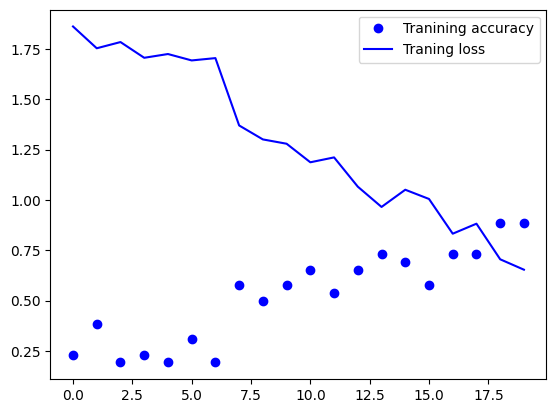

1/1 [==============================] - 3s 3s/step - loss: 0.5035 - accuracy: 0.9615
Test loss: 0.5035432577133179
Test accuracy: 0.9615384340286255


In [ ]:
#ploting the accuracy of the model
accuracy=history.history['accuracy']
loss=history.history['loss']
print(accuracy)
print(loss)
plt.plot(accuracy,'bo',label='Tranining accuracy')
plt.plot(loss,'b',label='Traning loss')
plt.legend()
plt.show()
#test losses and accuracy
score = model.evaluate(photos, labels, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#save the pretrained model
model.save('money_identify.h5')

1/1 [==============================] - 0s 214ms/step
[[0.88075906 0.0041473  0.0179714  0.01247541 0.02180879 0.0628382 ]]


'5k'

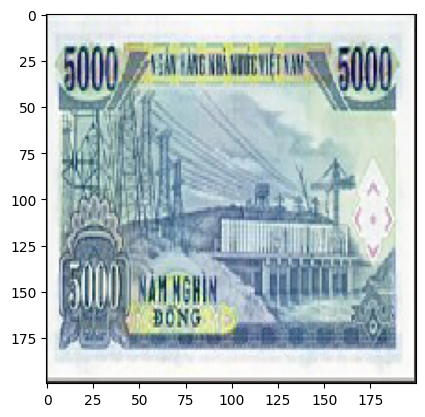

In [ ]:
#classes for each banknote
classes= ['5k','10k','20k','50k','100k','500k']

#load test image and reshape
img= load_img('/content/drive/MyDrive/test_tien/money-20230420T143649Z-001/money/5000vnd1.jpg', target_size=(200,200,3))

#predict the test image with the model
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')/255

y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]